In [1]:
using Plots
gr(size=(600,400))
plot(rand(3),rand(3))
scatter!(rand(3),rand(3))
nothing

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


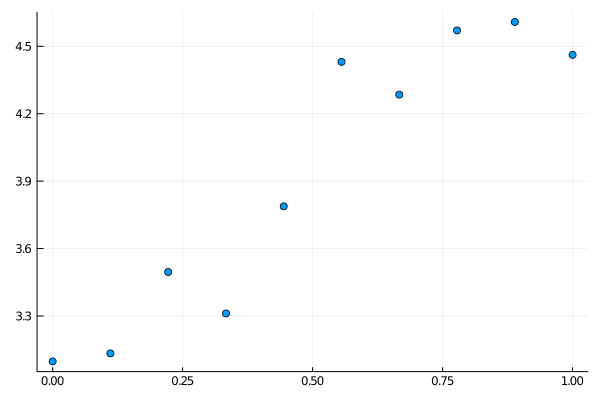

In [4]:
n = 10
x = range(0, 1, length=n)
y = 2x .+ 3 + randn(n) * 0.2

scatter(x, y, leg=false)

In [5]:
E(β₀, β₁) = sum((y[i] - β₀ - β₁ * x[i])^2 for i = 1:n) / 2

E (generic function with 1 method)

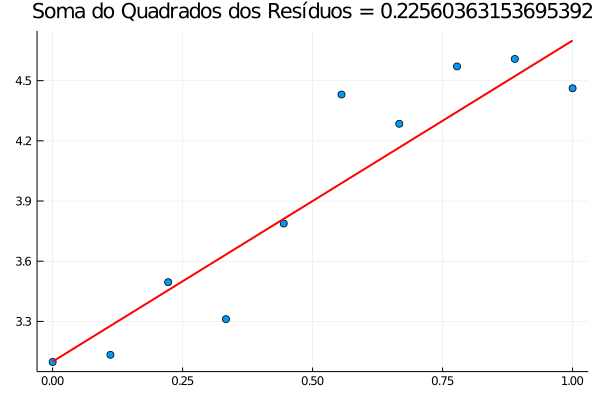

In [10]:
β₀ = 3.1
β₁ = 1.6

scatter(x, y, leg=false)
plot!(x -> β₀ + β₁ * x, extrema(x)..., c=:red, lw=2)
title!("Soma do Quadrados dos Resíduos = $(E(β₀, β₁))")

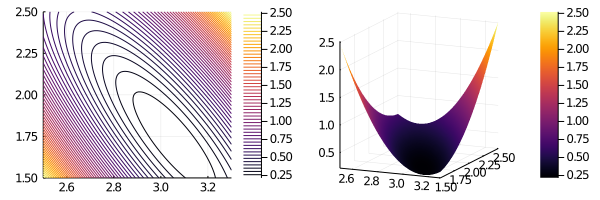

In [14]:
β₀range = range(2.5, 3.3, length=100)
β₁range = range(1.5, 2.5, length=100)
p = contour(β₀range, β₁range, E, levels=50, layout=(1,2), size=(600,200))
surface!(p[2], β₀range, β₁range, E)

In [15]:
M = [n  sum(x); sum(x)  sum(x .^ 2)]
c = [sum(y); sum(x .* y)]

βsol = M \ c

2-element Array{Float64,1}:
 3.0580422698818635
 1.7204286590925955

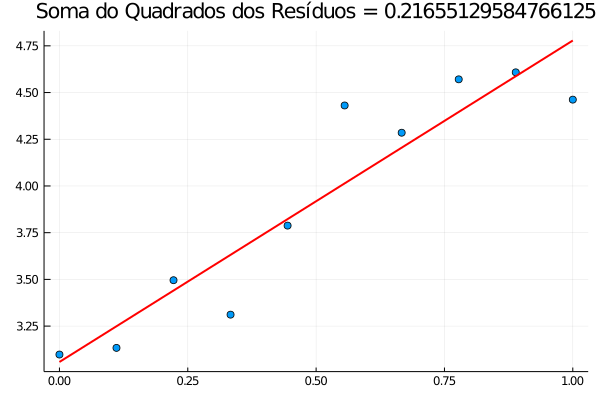

In [16]:
scatter(x, y, leg=false)
plot!(x -> βsol[1] + βsol[2] * x, extrema(x)..., c=:red, lw=2)
title!("Soma do Quadrados dos Resíduos = $(E(βsol[1], βsol[2]))")

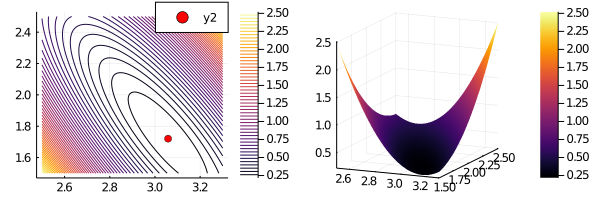

In [17]:
β₀range = range(2.5, 3.3, length=100)
β₁range = range(1.5, 2.5, length=100)
p = contour(β₀range, β₁range, E, levels=50, layout=(1,2), size=(600,200))
scatter!(p[1], [βsol[1]], [βsol[2]], c=:red)
surface!(p[2], β₀range, β₁range, E)

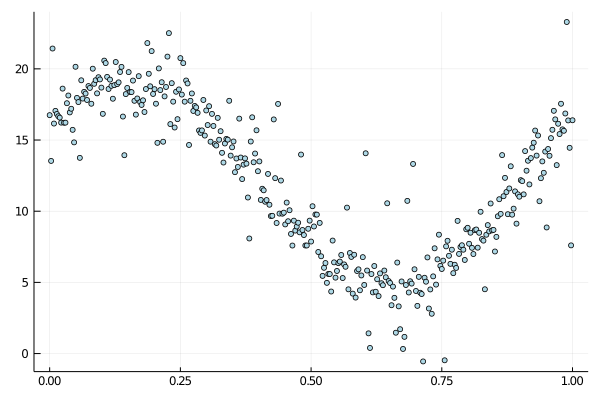

In [18]:
using Random
Random.seed!(0)

# Gerando dados fictícios para teste
n = 365
t = range(0, 1, length=n)

ϕ1(t) = sin(2π * t)
ϕ2(t) = cos(2π * t)
ϕ3(t) = 1.0

y = 6 * ϕ1.(t) + 4 * ϕ2.(t) + 12*ϕ3.(t) + randn(n)*1.1 +
    [rand() < 0.2 ? randn() * 3.5 : 0.0 for i = 1:n]

scatter(t, y, c=:lightblue, ms=3, leg=false)

In [19]:
M = zeros(3,3)
M[1,1] = sum(ϕ1(t[i]) * ϕ1(t[i]) for i = 1:n)
M[1,2] = sum(ϕ1(t[i]) * ϕ2(t[i]) for i = 1:n)
M[1,3] = sum(ϕ1(t[i]) * ϕ3(t[i]) for i = 1:n)
M[2,1] = M[1,2]
M[2,2] = sum(ϕ2(t[i]) * ϕ2(t[i]) for i = 1:n)
M[2,3] = sum(ϕ2(t[i]) * ϕ3(t[i]) for i = 1:n)
M[3,1] = M[1,3]
M[3,2] = M[2,3]
M[3,3] = sum(ϕ3(t[i]) * ϕ3(t[i]) for i = 1:n)

c = zeros(3)
c[1] = sum(y[i] * ϕ1(t[i]) for i = 1:n)
c[2] = sum(y[i] * ϕ2(t[i]) for i = 1:n)
c[3] = sum(y[i] * ϕ3(t[i]) for i = 1:n)

β = M \ c

3-element Array{Float64,1}:
  5.916093641802321
  3.953683742081815
 12.007860790666506

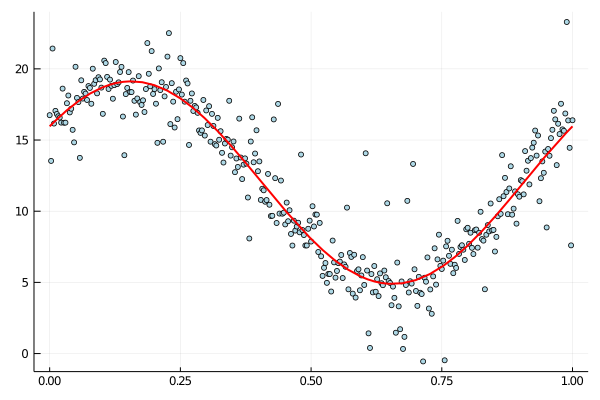

In [20]:
scatter(t, y, c=:lightblue, ms=3, leg=false)
plot!(t -> β[1] * ϕ1(t) + β[2] * ϕ2(t) + β[3] * ϕ3(t),
        extrema(t)..., c=:red, lw=2)

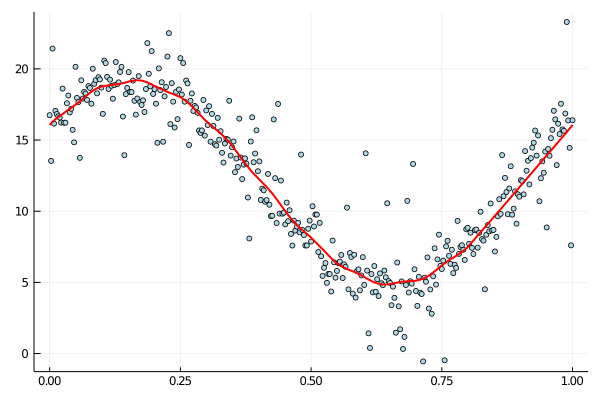

In [26]:
# F = [ϕ₁, ϕ₂, ϕ₃, …, ϕₚ]
F = [t -> sin(2π * t), t -> cos(2π * t), t -> 1.0,
     t -> sin(12 * 2π * t), t -> cos(12 * 2π * t)
    ]
p = length(F)
M = zeros(p, p)
c = zeros(p)
for j = 1:p
    for k = 1:p
        M[j,k] = sum(F[j](t[i]) * F[k](t[i]) for i = 1:n)
    end
    c[j] = sum(y[i] * F[j](t[i]) for i = 1:n)
end
β = M \ c
h(t) = sum(F[j](t) * β[j] for j = 1:p)

scatter(t, y, c=:lightblue, ms=3, leg=false)
plot!(h, extrema(t)..., c=:red, lw=2)

In [38]:
function quadmin(x, y, F)
    n = length(x)
    p = length(F)
    M = zeros(p, p)
    c = zeros(p)
    for j = 1:p
        for k = 1:p
            M[j,k] = sum(F[j](x[i]) * F[k](x[i]) for i = 1:n)
        end
        c[j] = sum(y[i] * F[j](x[i]) for i = 1:n)
    end
    β = M \ c
    h(x) = sum(F[j](x) * β[j] for j = 1:p)
    return β, h
end

quadmin (generic function with 1 method)

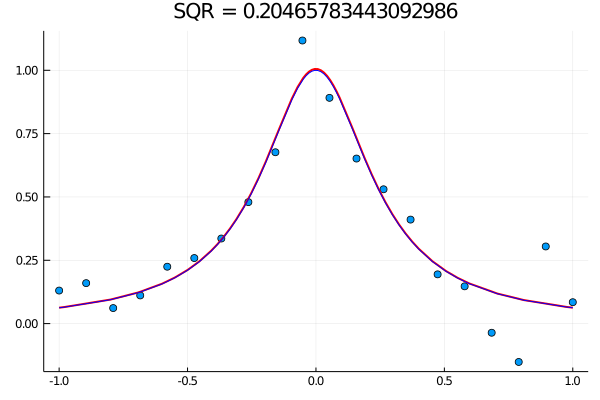

In [68]:
using LinearAlgebra, Random
Random.seed!(0)
n = 20
x = range(-1, 1, length=n)
y = 1 ./ (1 .+ 15 * x.^2) + randn(n) * 0.1
real(x) = 1 ./ (1 .+ 15 * x.^2)

scatter(x, y, leg=false)

# F = [x -> 1.0, x -> x, x -> x^2, x -> x^3, x -> x^4, x -> x^5,
#     x -> x^6, x -> x^7, x -> x^8, x -> x^10, x -> x^12, x -> x^14,
#     x -> x^16, x -> x^18, x -> x^20]
# F = [x -> x^j for j = 0:14]
# F = [x -> exp(-k * x^2) for k = 1:20]
F = [x -> 1 / (1 + 15x^2)]
β, modelo = quadmin(x, y, F)
r = y - modelo.(x)
SQR = norm(r)^2
plot!(modelo, extrema(x)..., c=:red, lw=2)
plot!(real, extrema(x)..., c=:blue)
title!("SQR = $SQR")